In [1]:
#Required Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
import shap

D:\Anaconda\envs\churn-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Reading the csv file
data= pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Basic Pre-processing

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5531,2137-DQMEV,Male,0,Yes,Yes,68,No,No phone service,DSL,Yes,...,No,No,Yes,No,One year,No,Mailed check,44.80,2983.65,No
2089,3933-DQPWX,Female,0,No,No,50,No,No phone service,DSL,No,...,Yes,Yes,No,No,Two year,No,Credit card (automatic),39.70,1932.75,No
2485,9921-ZVRHG,Female,0,No,No,14,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,80.45,1072,Yes
6979,5351-QESIO,Male,0,No,Yes,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,24.20,24.2,No
1715,0386-CWRGM,Female,0,Yes,Yes,46,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.40,967.85,No
1929,2018-QKYGT,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,81.05,81.05,No
5149,3970-XGJDU,Female,0,No,No,62,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.20,1123.65,No
4840,5730-RIITO,Female,1,No,No,43,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),33.45,1500.25,No
6532,1763-KUAAW,Female,1,No,No,18,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),20.35,369.6,No
1148,7851-WZEKY,Female,0,No,No,2,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.15,196.9,Yes


In [5]:
data.shape

(7043, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
#changing the type of totalcharges from object to numeric
data['TotalCharges']=pd.to_numeric(data['TotalCharges'], errors='coerce')

In [8]:
#looking for missing data
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
#checking skewness in TotalCharges to decide if mean or median imputation is better
data['TotalCharges'].skew()

np.float64(0.961642499724251)

Since the skewness is greater than 0.5, median imputation is preferred, because it is not affected by extreme values, where mean can distort the distribution

In [10]:
#Missing Value Imputation
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_3412\4175005575.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


In [11]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
#statistical demographics
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
#checking for duplicate rows in the data
data.duplicated().sum()

np.int64(0)

# EDA

C:\Users\HP\AppData\Local\Temp\ipykernel_3412\2445105650.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=data, palette=['#FF6B6B','#4ECDC4'])


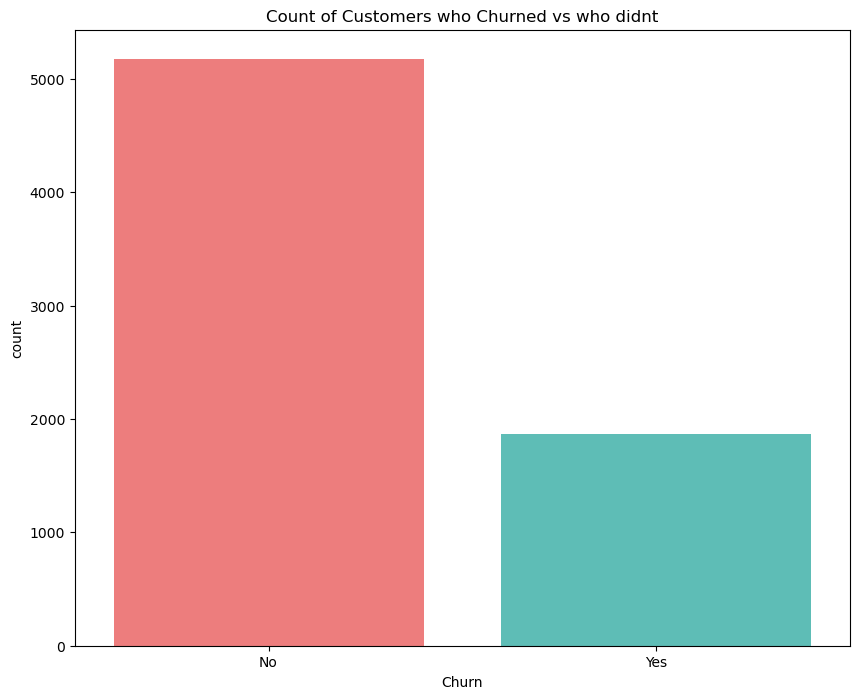

In [14]:
#plotting the distribution of the target variable
plt.figure(figsize=(10,8))
sns.countplot(x='Churn', data=data, palette=['#FF6B6B','#4ECDC4'])
plt.title('Count of Customers who Churned vs who didnt')
plt.show()

In [15]:
#Extracting numerical and categorical columns from the data into lists
numerical_cols= data.select_dtypes(include=['int64','float64']).columns
categorical_cols=data.select_dtypes(include=['object']).columns

In [16]:
numerical_cols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [17]:
categorical_cols

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

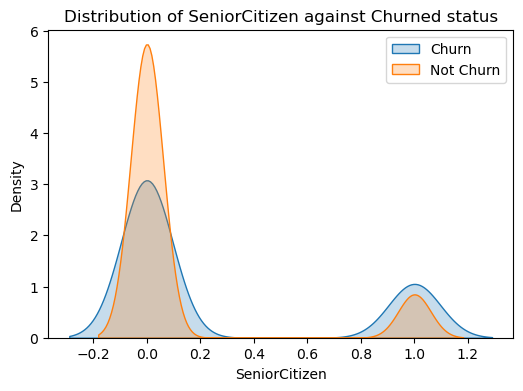

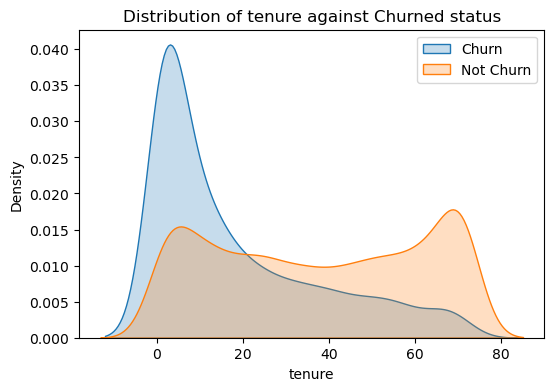

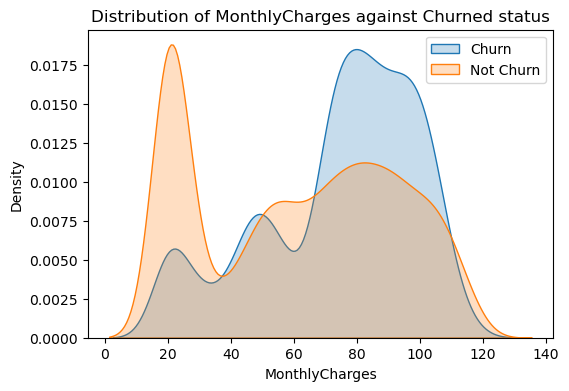

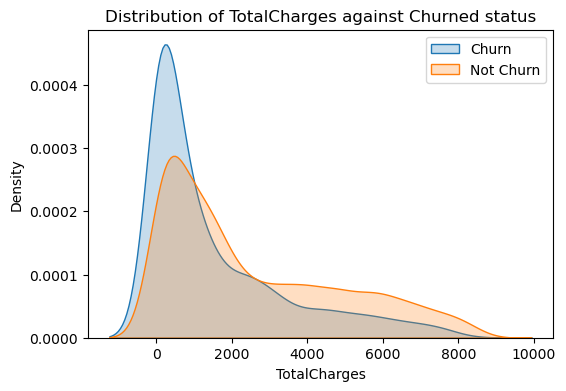

In [18]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data[data['Churn']=='Yes'][col], label='Churn', fill=True)
    sns.kdeplot(data[data['Churn']=='No'][col], label='Not Churn', fill=True)
    plt.title(f'Distribution of {col} against Churned status')
    plt.legend()
    plt.show()

**Insights**

*From Senior Citizens vs Churn*

- Young customers are more likely to stay as compared to senior citizens. This suggests that older customers might face more challenges or dissatisfaction with the service. From Tenure vs Churn
- Customers who stayed for lower tenure are more likely to churn (as indicated by blue curve)
- Customers with longer tenure will arrely churn ( lower values of blue curve around larger values of tenure)
- Customers who have recently joined and have not churned yet (orange curve) are at higher risk of churning if not retained. This can be done by employing engagement strategies.
- A larger proportion of customers who have not churned yet are the ones who have stayed for longer tenure period (60-80).

*From MonthlyCharges vs Churn*

- Most customers with lower monthly charges are not churning.
- As the monthly charges increases, churn probability increases.
- Despite this trend, a significant proportion of high-[aying customers are retained probably because of some premium services provided to them or maybe they are satisfied with the prices because of the quality of service they recieve in return.

*From TotalCharges vs Churn*

- Most churners paid lesser total charges.
- For higher ranges, the orange curve dominates more, indicating that people who paid larger charges exhibit higher possibility of styaing than leaving (as the blue curve is slighlty smaller for large values of totalcharges).

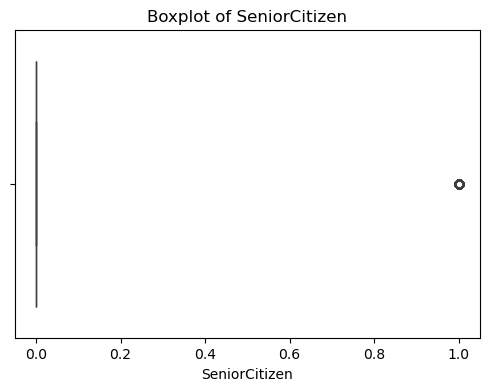

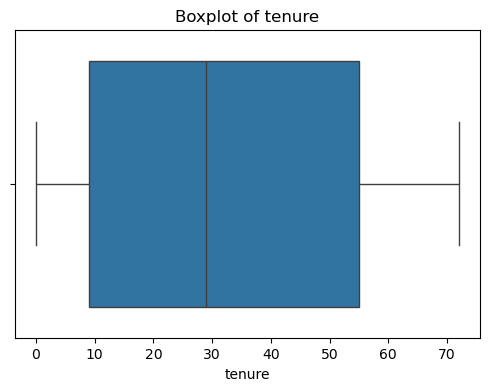

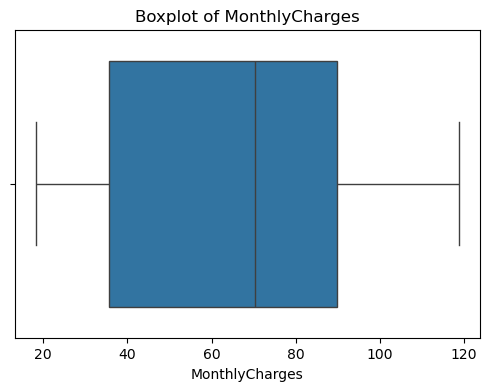

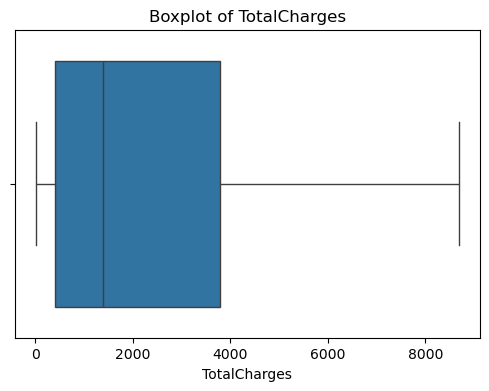

In [19]:
#checking for outliers

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

- The above boxplots suggests no outliers. 
- For senior citizen, since it had only binary values, this is why the box plots looks like this, because probably the data had more 0s then 1s, which is why there are dots at 1, which is actually not outlier but real data.
- For other features, since there are no dots outside the whiskers, it implies there are no outliers present.

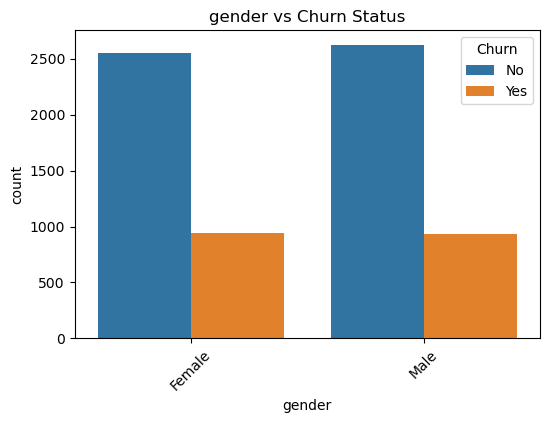

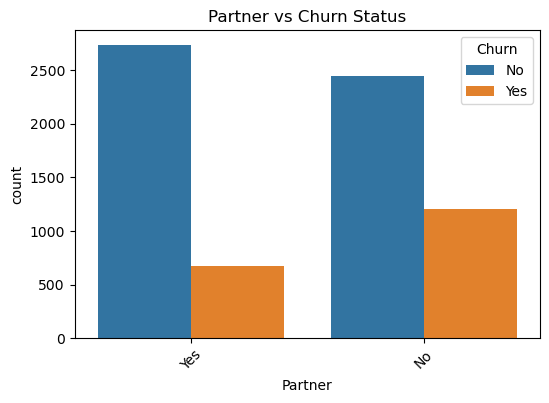

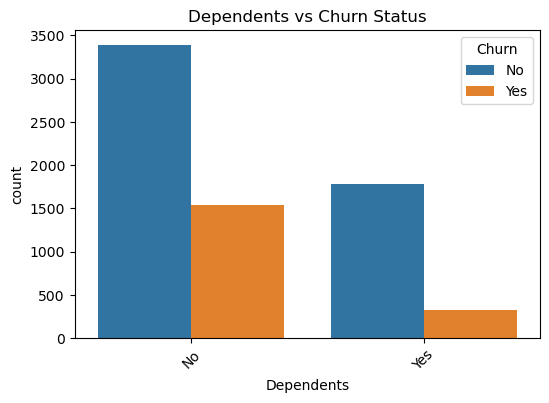

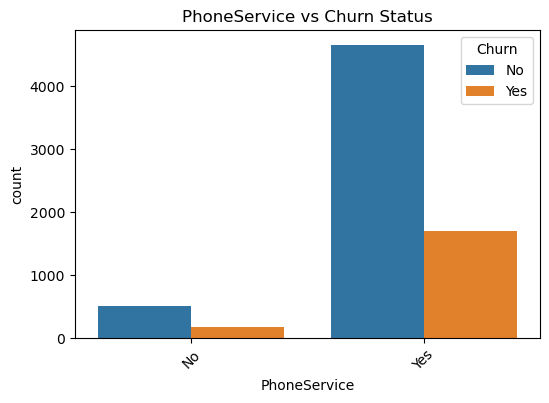

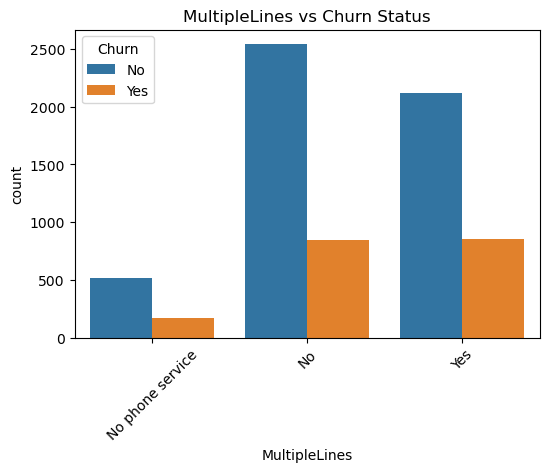

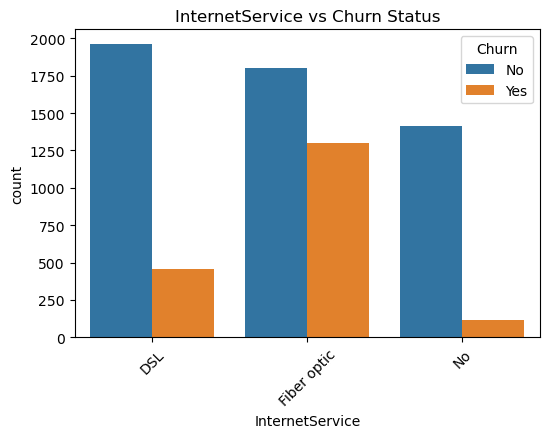

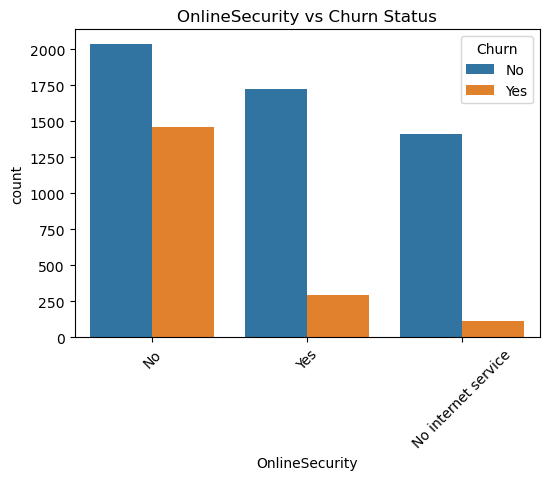

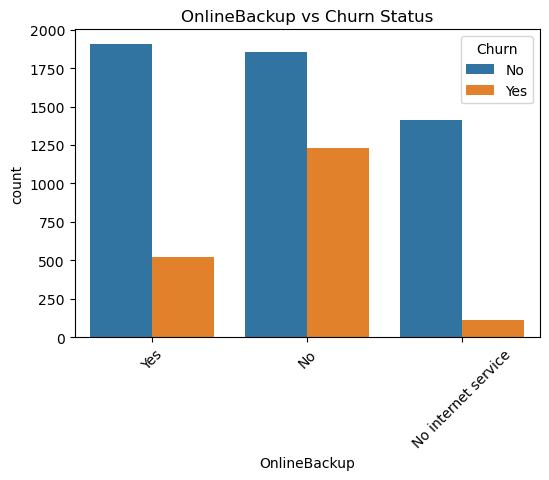

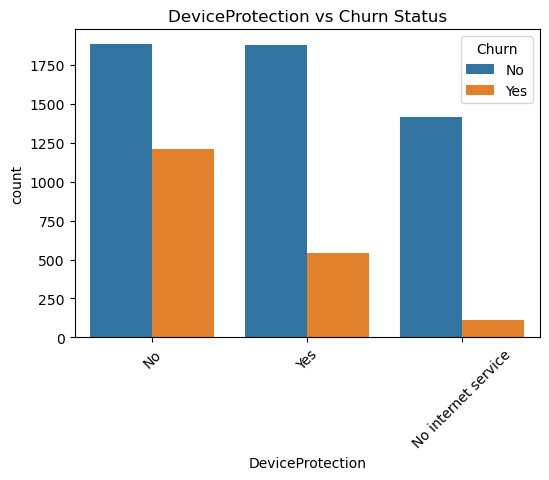

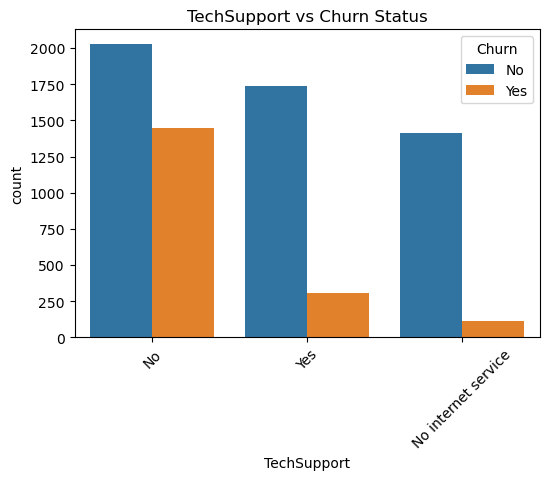

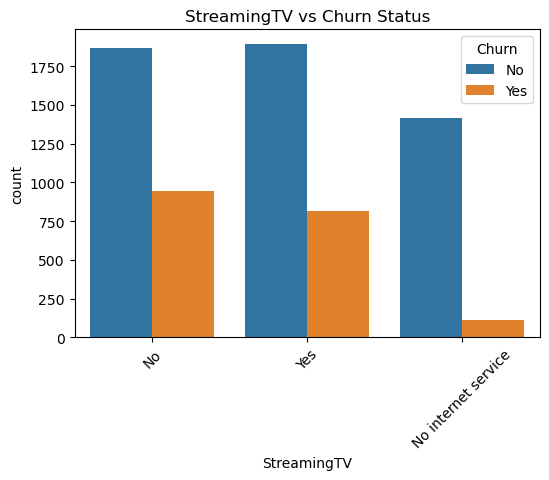

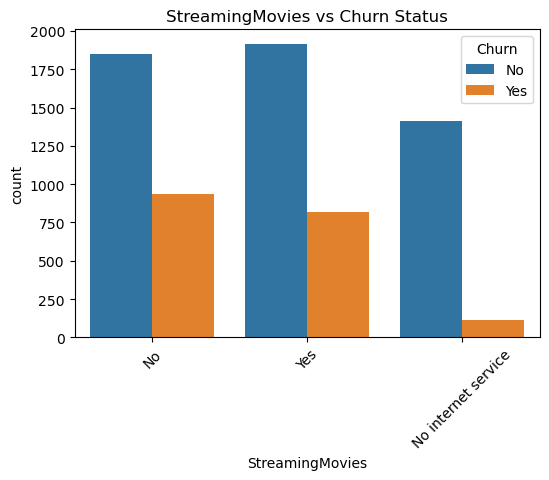

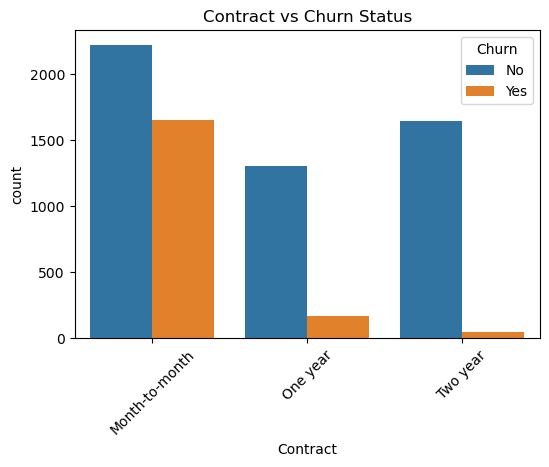

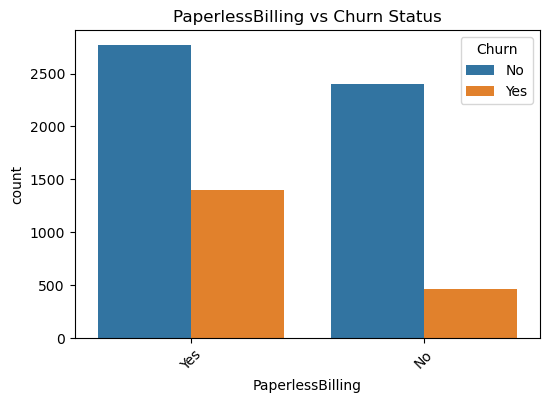

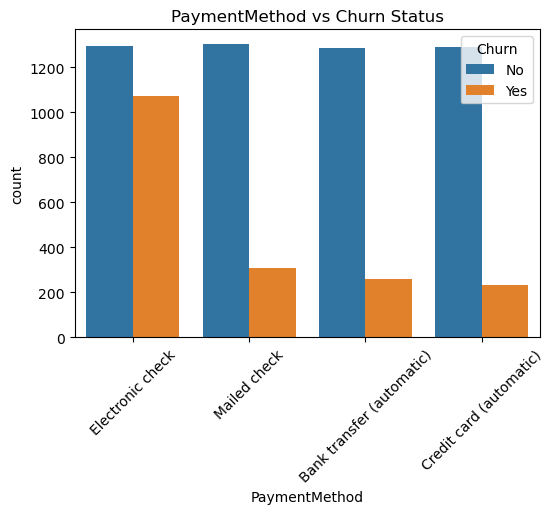

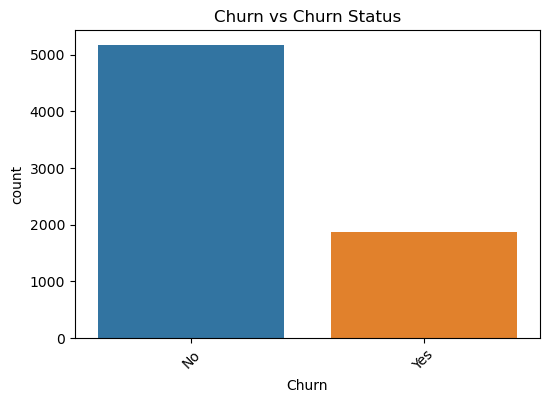

In [21]:
#Exploring the realtionship between categorical variables and target
for col in categorical_cols:
    if col != 'customerID':
        plt.figure(figsize=(6,4))
        sns.countplot(x=col, hue='Churn', data=data)
        plt.title(f'{col} vs Churn Status')
        plt.xticks(rotation=45)
        plt.show()

- Customers who have partners are churning less than those who don't have a partner.
- Customers with dependants ( total ~ 2400, churned ~400) are less likely to churn than those without dependant( total ~4900, churned ~1500)
- Customers with multiple lines have slightly higher churn rate than those with single lines.
- Amongst the internet services, customers using Fibre Optic have higher churn rate. Those with DSL have comparatively lower churn rates and ones without internet rarely churn.
- Those with no online security exhibit very high churn rate while customers who have online security are more likely to stay.
- Customers without online backup churns more as compared to those with backup.
- Customers without device protection and technsupport churn more.
- There is a small difference in the no of customers churning if they have streaming Tv vs when they don't. Similar trend is followed by streaming movies.
- Customers who opt for monthly contracts have higher churn rates as compared to those who opted for yearly contracts.
- Customers using paperless billing have higher churn rate as compared to those who were not using paperless billing.
- Electronic check users have highest churn rate.

In [22]:
#Performing chi-square test to determine what features have high association with target
results=[]
for col in categorical_cols:
    contingency_table = pd.crosstab(data[col], data['Churn'])
    chi2, p, dof, expected= chi2_contingency(contingency_table)
    results.append([col,p])

chi_df= pd.DataFrame(results, columns=['Feature','p_value'])
significant_feat= chi_df[chi_df['p_value']<0.05]
print (significant_feat)

             Feature        p_value
2            Partner   2.139911e-36
3         Dependents   4.924922e-43
5      MultipleLines   3.464383e-03
6    InternetService  9.571788e-160
7     OnlineSecurity  2.661150e-185
8       OnlineBackup  2.079759e-131
9   DeviceProtection  5.505219e-122
10       TechSupport  1.443084e-180
11       StreamingTV   5.528994e-82
12   StreamingMovies   2.667757e-82
13          Contract  5.863038e-258
14  PaperlessBilling   4.073355e-58
15     PaymentMethod  3.682355e-140
16             Churn   0.000000e+00


# Feature Engineering

In [23]:
#Applying one-hot encoding on categorical variables
encoded_data=pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [24]:
encoded_data.sample(10)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
5813,0,48,111.80,5443.65,False,False,False,False,False,False,...,True,False,True,False,True,False,True,False,False,False
4118,0,40,74.80,2971.70,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
7020,0,12,19.20,239.00,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
4454,0,4,19.40,93.40,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
6499,0,1,20.30,20.30,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
984,0,72,23.75,1679.25,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
2689,1,72,116.75,8277.05,False,False,False,False,False,False,...,True,False,True,False,True,True,True,False,False,False
5790,0,40,50.85,2036.55,False,False,False,False,False,False,...,True,False,True,False,False,True,False,True,False,False
8,0,28,104.80,3046.05,False,False,False,False,False,False,...,True,False,True,False,False,True,False,True,False,True
6804,0,5,90.35,434.50,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,True,False


In [25]:
#encoding Boolean Values of new cols into binary values

bool_cols= encoded_data.select_dtypes(include='bool').columns
encoded_data[bool_cols] = encoded_data[bool_cols].astype(int)

In [26]:
encoded_data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,0,0,0,0,...,1,0,1,1,0,1,0,0,1,0
7039,0,72,103.20,7362.90,0,0,0,0,0,0,...,1,0,1,1,0,1,1,0,0,0
7040,0,11,29.60,346.45,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
7041,1,4,74.40,306.60,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1


In [27]:
# Segregating the target from the features

X= encoded_data.drop('Churn_Yes', axis=1)
y= encoded_data['Churn_Yes']

In [28]:
#Scaling the numeric features for LogisticRegression model

X_logreg= X.copy()
scaler= StandardScaler()
X_logreg[numerical_cols]= scaler.fit_transform(X_logreg[numerical_cols])

# Train-Test Split

In [29]:
# Train-Test split for Logistic Regression
X_lr_train,X_lr_test,y_train,y_test= train_test_split(X_logreg, y, test_size=0.2, random_state=42, stratify=y)

#Train-Test split for Random Forest
X_rf_train,X_rf_test, y_rf_train,y_rf_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

# Building Models

In [30]:
#Logistic Regression

m1= LogisticRegression(class_weight='balanced', max_iter=1000)
m1.fit(X_lr_train,y_train)
y_pred_lr= m1.predict(X_lr_test)

In [31]:
#Random Forest Model

m2= RandomForestClassifier(class_weight='balanced',random_state=42)
m2.fit(X_rf_train,y_rf_train)
y_pred_rf= m2.predict(X_rf_test)

# Evaluating models

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1035
           1       0.53      0.75      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.80      0.75      0.77      1409

Logistic Regression Confusion Matrix: 


<Figure size 800x600 with 0 Axes>

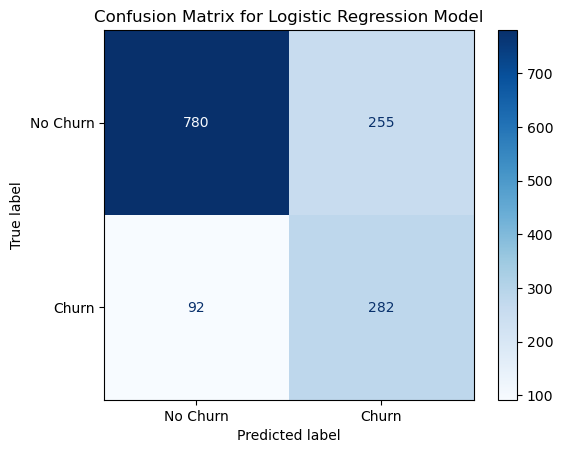

AUC for Logistic Regression
0.8410783022036221


In [32]:
print('Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred_lr))
print('Logistic Regression Confusion Matrix: ')
cm_lr= confusion_matrix(y_test,y_pred_lr)
displ_cm_lr= ConfusionMatrixDisplay(confusion_matrix= cm_lr, display_labels=['No Churn', 'Churn'])
plt.figure(figsize=(8,6))
displ_cm_lr.plot(cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()
print('AUC for Logistic Regression')
print(roc_auc_score(y_test, m1.predict_proba(X_lr_test)[:,1]))

- The model achieves an overall of 75% accuracy.
- However, when other statistics are looked upon, it was identified that the model performs well in predicting the non-churners (class 0) as it achieves an F1 score of 0.82 for the class. The model struggles to correctly identify the churners with F1 score of only 0.62.
- From the confusion matrix, the number of false positives are- 255. This is the number of people who actually stayed but the model predicted them as churners, which is just a false alarm and not too harmful. No of false negatives in our model are- 92, people who were leaving but the model predicted them as non-churners. This is critical because these customers are losing but the model is not detecting them. 
- The Logistic Regression model achieved an AUC score of 0.841, indicating strong capability in distinguishing between churned and non-churned customers. However, while overall performance is good, further improvements are needed to increase recall for churners to reduce customer loss risk.
- The model favours churners even though it occasionally labels non-churners as churners. This is fine because extending extra retention offers is better than losing customers at high-risk.

Random Forest Classifier Classification Report
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.67      0.50      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409

Confusion Matrix for Random Forest


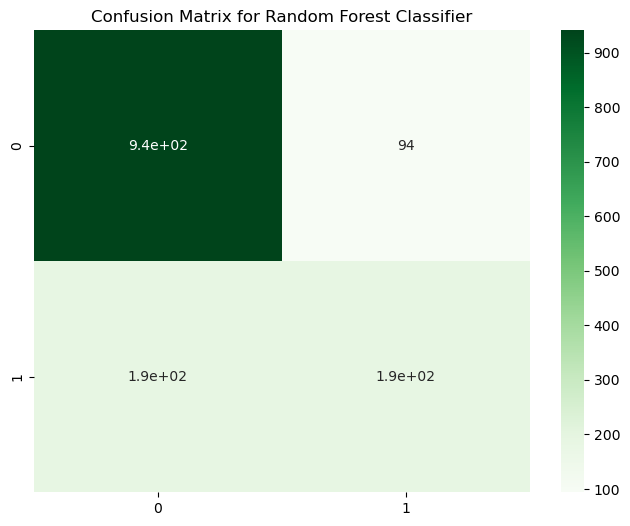

AUC score for Random Forest Classifier
0.8341225554780543


In [33]:
print('Random Forest Classifier Classification Report')
print(classification_report(y_rf_test, y_pred_rf))

print('Confusion Matrix for Random Forest')
cm_rf=confusion_matrix(y_rf_test, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=True, cmap='Greens')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

print('AUC score for Random Forest Classifier')
print(roc_auc_score(y_rf_test, m2.predict_proba(X_rf_test)[:,1]))

- The overall accuracy of this model is 80%.
- Precision value of churners is more fro Random Forest, which highlights this model is better at predicting churners than Logistic Regression.
- The recall value, however, is low as compared to the former model, which means Random Forest is actually missing half of the actual churners, which is risky.
- The confusion matrix suggests that the model is very good at identifying the non-churners(940). Only 94 non-churners have been identified as churners, which is fine as these are just false alarms.
- Out of 374 churners, only 187 have been correctly classified, which means that the model nearly misses half of the actual churners, which is a risky impact on the business. high value of False negatives is the worst-case scenario here because the company assumes that the customer is satisfied, whereas they are on a high risk of leaving.
- The Random Forest model achieves higher overall accuracy (80%) and precision for churn prediction (67%) compared to Logistic Regression. However, its recall for churn detection is limited to 50%, meaning it fails to identify half of the customers at risk of churning. In contrast, Logistic Regression captures 75% of churners but gives more false alerts. Therefore, Logistic Regression is more suitable for churn prevention, where identifying at-risk customers is critical.

# Hyperparameter Tuning

In [34]:
lr= LogisticRegression(class_weight ='balanced', max_iter=1000, random_state=42)
param_grid_lr= {
'C': [0.01, 0.1,1,10,100],
'penalty': ['l2'],
 'solver': ['lbfgs']   
}

grid_lr= GridSearchCV(
    estimator=lr,
    param_grid=param_grid_lr,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_lr.fit(X_lr_train, y_train)

print('Best parameters for Logistic Regression:')
print(grid_lr.best_params_)
print('Best CV AUC score:', grid_lr.best_score_)

best_lr= grid_lr.best_estimator_

lr_best_y_pred= best_lr.predict(X_lr_test)
lr_best_y_proba= best_lr.predict_proba(X_lr_test)[:,1]

print('Classification Report for the Best Logistic Regression Model')

print(classification_report(y_test, lr_best_y_pred))

print('Test AUC:', roc_auc_score(y_test, lr_best_y_proba))


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters for Logistic Regression:
{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV AUC score: 0.8449525481927884
Classification Report for the Best Logistic Regression Model
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1035
           1       0.58      0.62      0.60       374

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.73      1409
weighted avg       0.79      0.78      0.78      1409

Test AUC: 0.8409181327339895


- There is a huge improvement in the Recall value for Class 0 (0.75 -> 0.84) and in the accuracy score (75->78%).
- Other parameters like F1 for Class 0 and Precision for Class 1 have also improved.
- However, there is a significant drop in the Recall value for class 1(0.75-> 0.62), which suggests baseline LR model was better at predicting churners.


In [35]:
rf= RandomForestClassifier( class_weight='balanced', random_state=42)

param_grid_rf={
    'n_estimators':[100,200,300],
    'max_depth': [None, 5,10],
    'min_samples_leaf' :[1,2,4]
}

grid_rf= GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_rf.fit(X_rf_train,y_rf_train)

print('Best params for Random Forest')

print(grid_rf.best_params_)

print('Best CV AUC:' , grid_rf.best_score_)

best_rf= grid_rf.best_estimator_

rf_best_y_pred = grid_rf.predict(X_rf_test)
rf_best_y_proba = grid_rf.predict_proba(X_rf_test)[:,1]

print('Classification Report: ')
print(classification_report(y_test, rf_best_y_pred))

print('Test AUC', roc_auc_score(y_test, rf_best_y_proba))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best params for Random Forest
{'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 300}
Best CV AUC: 0.8365362656045379
Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.66      0.51      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

Test AUC 0.8364979720478442


- This is just slightly better than the untuned version.
- Tiny improvements can be seen in the AUC score, Class 1 recall value and Class 0 precision.
- The accuracy remained stable for the models.

# Applying SHAP

In [36]:
#Choosing background and sample test set

#Picking background
background_rf= X_rf_train.sample(n=min(500, len(X_rf_train)), random_state=42)
background_lr= X_lr_train.sample(n=min(500, len(X_lr_train)), random_state=42)

#Picking sample tests to explain
X_rf_sample= X_rf_test.sample(n=min(1000, len(X_rf_test)),random_state=42)
X_lr_sample= X_lr_test.sample(n=min(1000, len(X_lr_test)),random_state=42)

In [50]:
#Choosing SHAP Explainers

explainer_rf= shap.TreeExplainer(best_rf, data= background_rf, feature_perturbation='interventional')
shap_exp_rf= explainer_rf(X_rf_sample)

vals= np.array(shap_exp_rf.values)

if vals.ndim ==3:
    shap_values_rf= vals[:,:,1]
else:
    shap_values_rf= vals

100%|===================| 1999/2000 [19:55<00:00]        

In [51]:
#Linear Explainer for Logistic Regression
explainer_lr= shap.LinearExplainer(best_lr, background_lr, feature_perturbation='interventional')
shap_values_lr_all= explainer_lr.shap_values(X_lr_sample)

if isinstance(shap_values_lr_all, list):
    shap_values_lr = shap_values_lr_all[0]
else:
    shap_values_lr = shap_values_lr_all

D:\Anaconda\envs\churn-env\lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


In [52]:
print("RF SHAP shape:", shap_values_rf.shape)
print("LR SHAP shape:", shap_values_lr.shape)


RF SHAP shape: (1000, 7072)
LR SHAP shape: (1000, 7072)


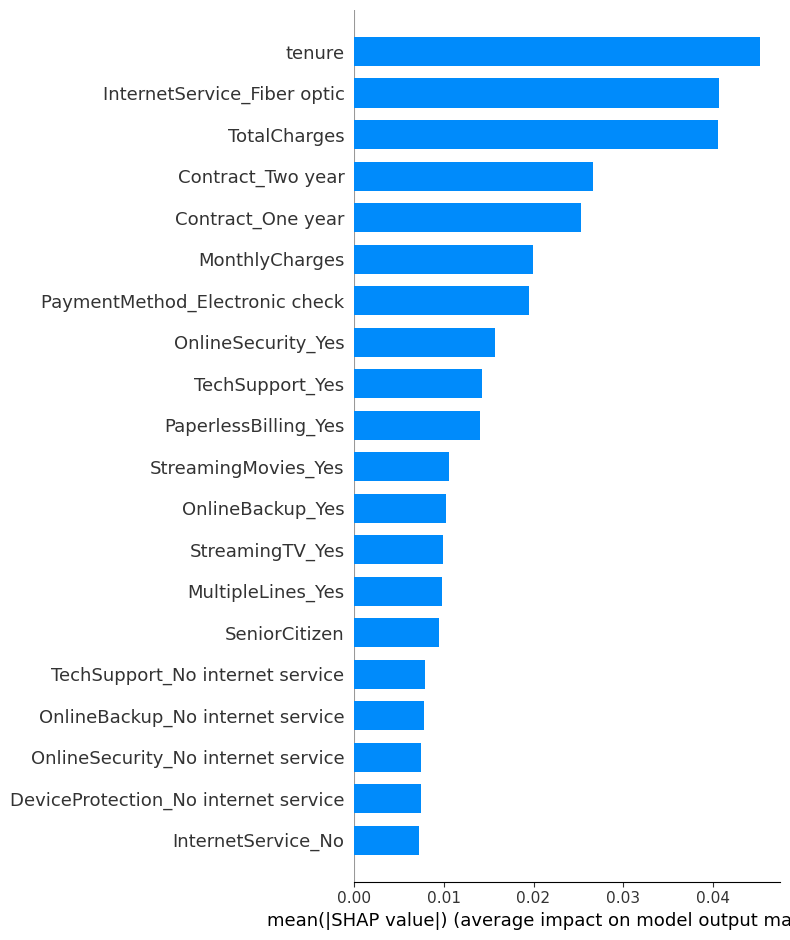

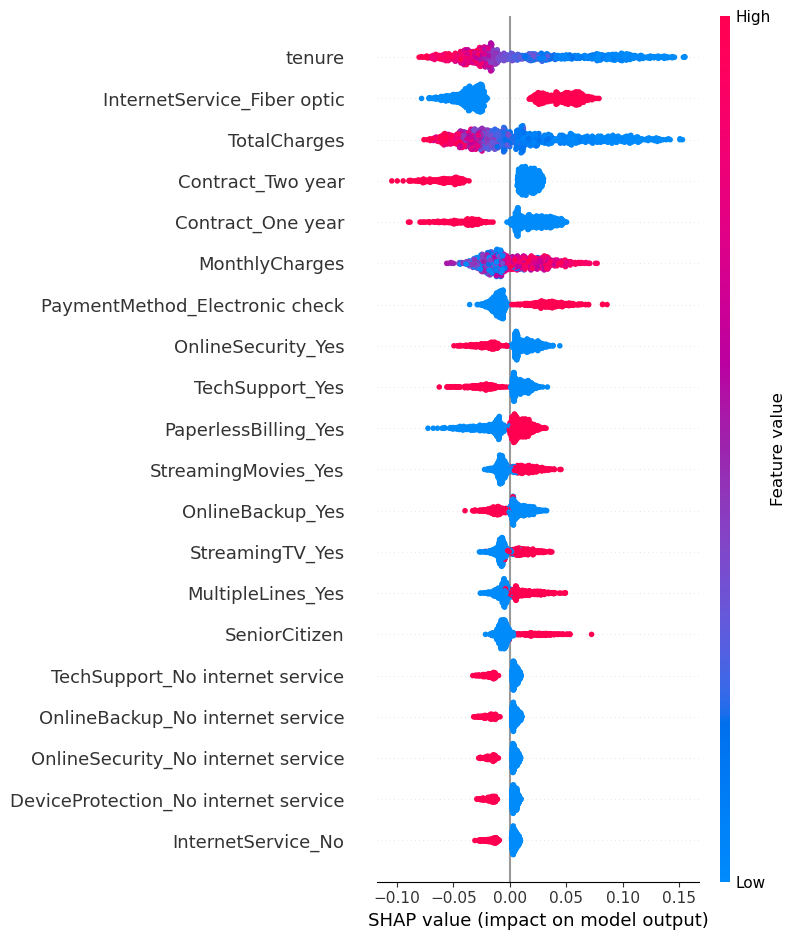

In [53]:
#Global Explanation for RF
shap.summary_plot(shap_values_rf, X_rf_sample, plot_type='bar', show=True)
shap.summary_plot(shap_values_rf, X_rf_sample, show=True)

## Insights from Bar Plot-
The SHAP bar plot shows global feature importance ranked by average absolute impact on predictions. Tenure is the strongest predictor of churn, meaning a customer’s length of stay has the largest influence on model outputs. Internet service type, total charges, and contract length are also key predictors, reflecting customer loyalty and billing structure. Monthly charges and payment method have moderate influence, while additional services like online security or streaming have lower global importance. This helps us understand which variables contribute the most to churn risk and allows actionable business prioritization.

## Insights from Beeswarm Plot-
The plot shows that low-tenure customers, fiber optic internet customers, and customers with low historical spending are significantly more likely to churn. Monthly contracts, high monthly charges, and electronic check payments also correlate with churn. In contrast, customers with long tenure, higher total billing history, and longer-term contracts show reduced churn probability. These insights identify high-risk segments for targeted retention campaigns.

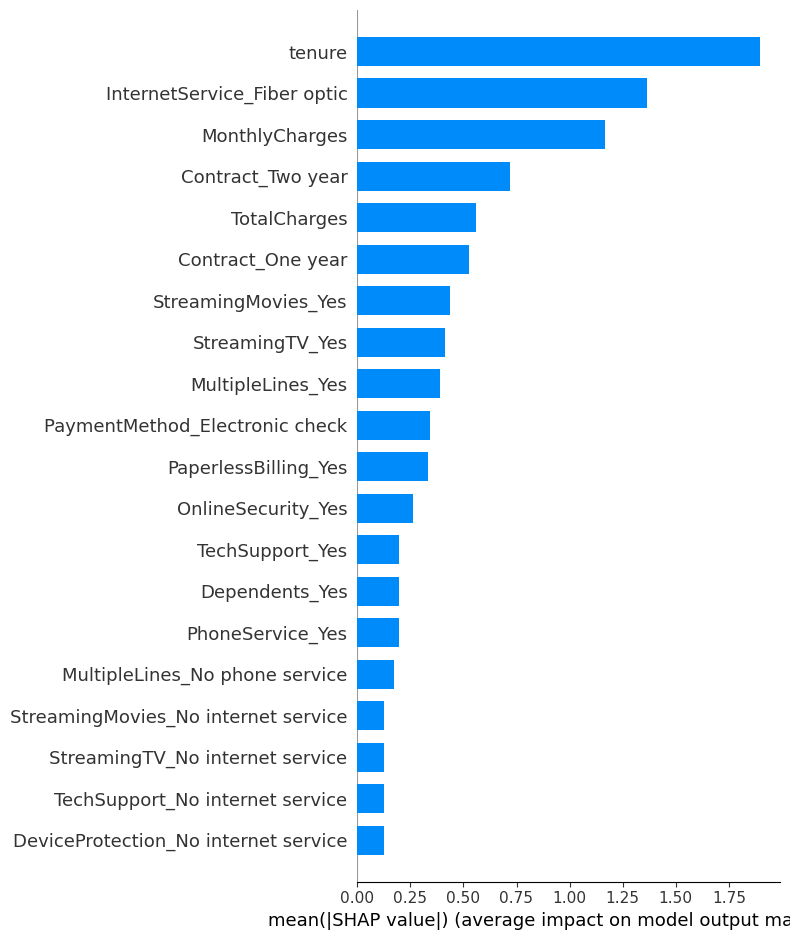

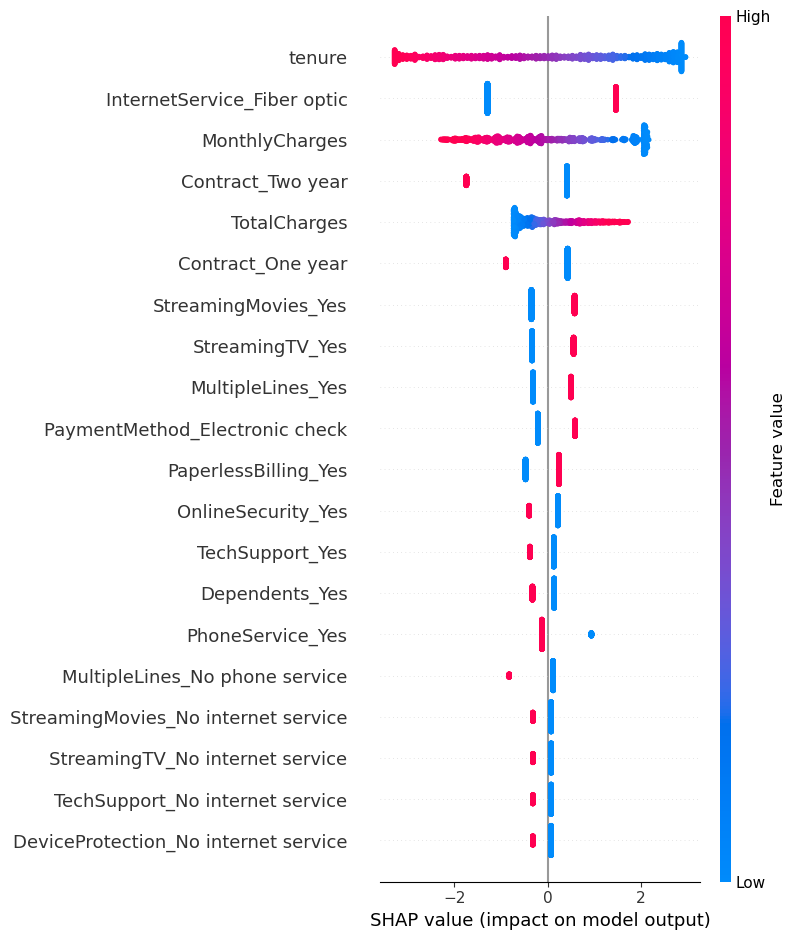

In [54]:
#Global Explanation for LR
shap.summary_plot(shap_values_lr, X_lr_sample, plot_type='bar', show=True)
shap.summary_plot(shap_values_lr, X_lr_sample, show=True)

In [55]:
#Feature Importance Table 

#For RF
shap_df_rf= pd.DataFrame(np.abs(shap_values_rf), columns= X_rf_sample.columns)
mean_abs_shap_rf= shap_df_rf.mean().sort_values(ascending=False)
print('Top RF features by mean: ')
print(mean_abs_shap_rf.head(20))


#For LR
shap_df_lr= pd.DataFrame(np.abs(shap_values_lr), columns= X_lr_sample.columns)
mean_abs_shap_lr= shap_df_lr.mean().sort_values(ascending=False)
print('Top LR features by mean:')
print(mean_abs_shap_lr.head(20))

Top RF features by mean: 
tenure                                  0.045237
InternetService_Fiber optic             0.040676
TotalCharges                            0.040586
Contract_Two year                       0.026623
Contract_One year                       0.025305
MonthlyCharges                          0.019890
PaymentMethod_Electronic check          0.019459
OnlineSecurity_Yes                      0.015700
TechSupport_Yes                         0.014206
PaperlessBilling_Yes                    0.014058
StreamingMovies_Yes                     0.010594
OnlineBackup_Yes                        0.010186
StreamingTV_Yes                         0.009883
MultipleLines_Yes                       0.009742
SeniorCitizen                           0.009408
TechSupport_No internet service         0.007861
OnlineBackup_No internet service        0.007835
OnlineSecurity_No internet service      0.007431
DeviceProtection_No internet service    0.007420
InternetService_No                      0.0

Dependence plot for: tenure


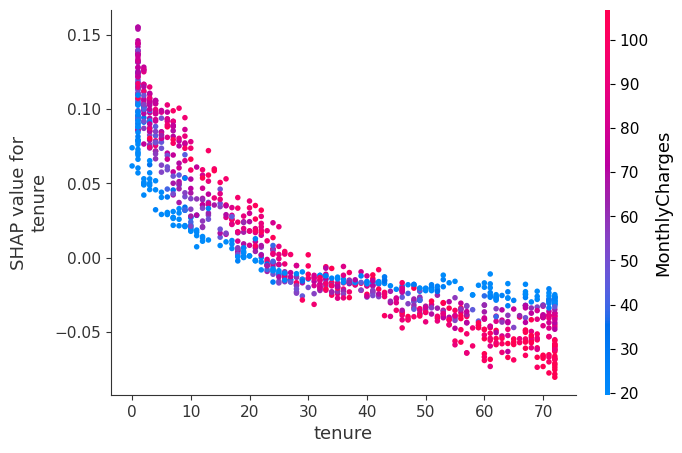

Dependence plot for: InternetService_Fiber optic


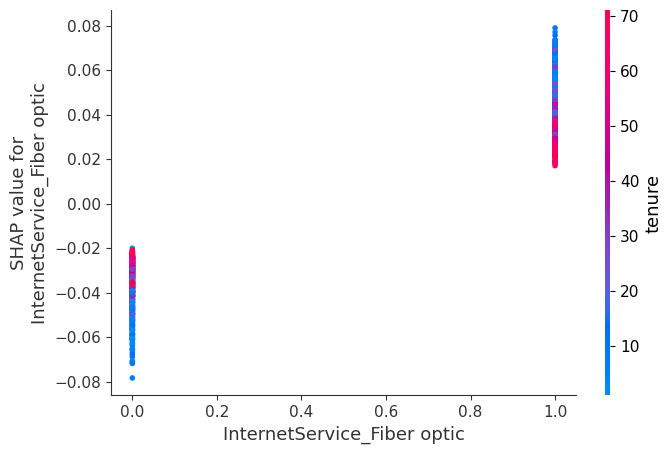

Dependence plot for: TotalCharges


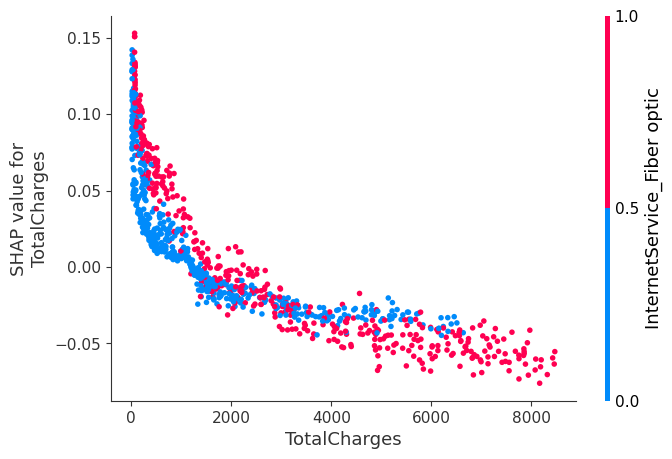

Dependence plot for: Contract_Two year


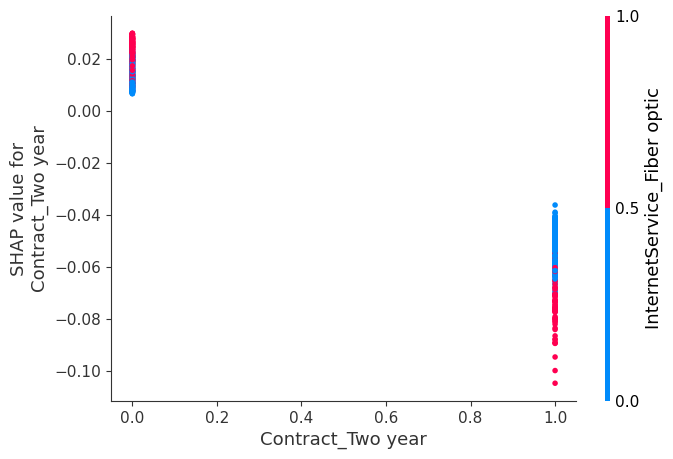

Dependence plot for: Contract_One year


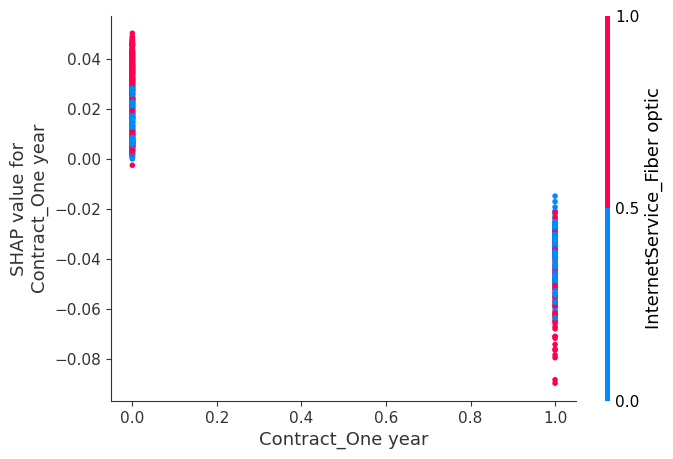

Dependence plot for: tenure


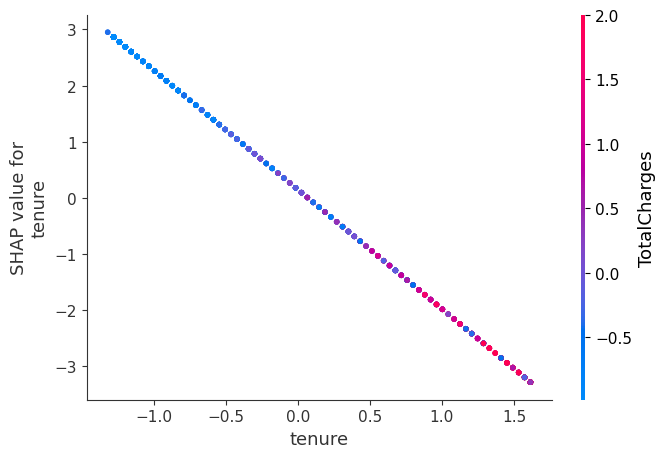

Dependence plot for: InternetService_Fiber optic


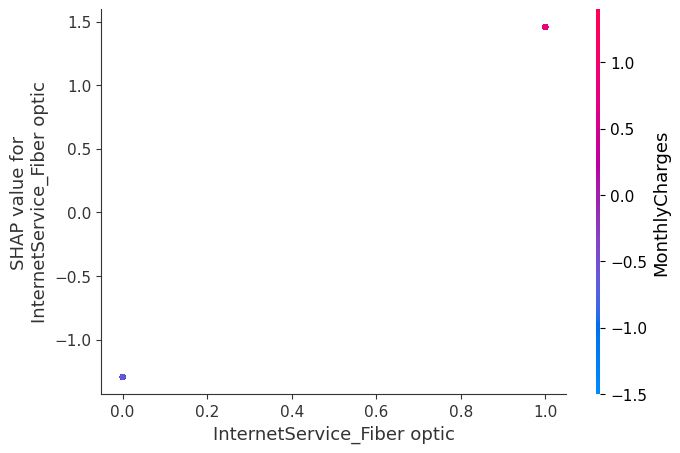

Dependence plot for: MonthlyCharges


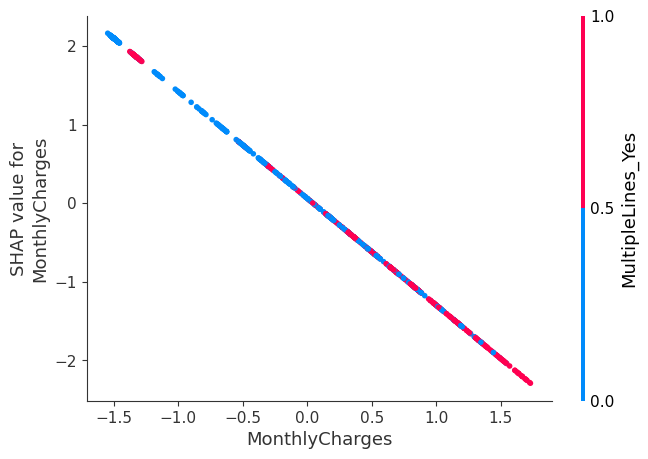

Dependence plot for: Contract_Two year


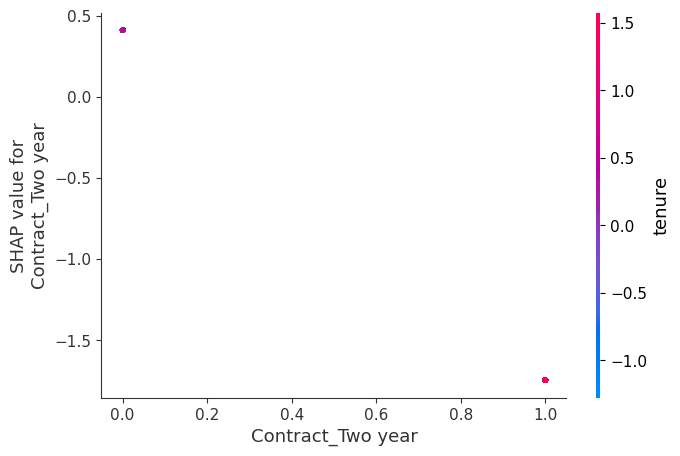

Dependence plot for: TotalCharges


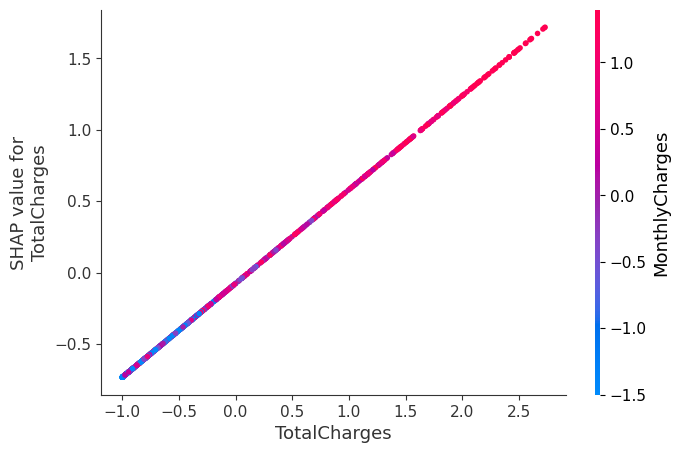

In [56]:
top_rf = mean_abs_shap_rf.index[:5].tolist()
for feat in top_rf:
    print("Dependence plot for:", feat)
    shap.dependence_plot(feat, shap_values_rf, X_rf_sample, show=True)

top_lr = mean_abs_shap_lr.index[:5].tolist()
for feat in top_lr:
    print("Dependence plot for:", feat)
    shap.dependence_plot(feat, shap_values_lr, X_lr_sample, show=True)


- Insights from First dependence plot- (tenure, Monthly Charges)-
Short-tenure customers are at highest churn risk. The longer a customer stays, the more likely they are to remain loyal. High monthly charges worsen churn risk, but tenure matters a lot more.
- Second Dependence plot - (Fibreoptic, tenure)-
  Fiber optic increases churn risk, but tenure moderates it, long-term fiber optic customers are more stable.
- Dependence plot(tenure, total charges)- New customers (low tenure) churn because they are new and have paid little.
Old customers (high tenure) churn less because they are loyal and have paid a lot.

In [57]:
fi = pd.Series(best_rf.feature_importances_, index=X_rf_train.columns).sort_values(ascending=False)
print("RandomForest feature_importances_ (top 20):")
print(fi.head(20))


RandomForest feature_importances_ (top 20):
tenure                                   0.095660
TotalCharges                             0.095618
MonthlyCharges                           0.081422
Contract_Two year                        0.034596
InternetService_Fiber optic              0.030327
PaymentMethod_Electronic check           0.027370
Contract_One year                        0.023292
OnlineSecurity_Yes                       0.023200
TechSupport_Yes                          0.022698
PaperlessBilling_Yes                     0.019123
gender_Male                              0.015414
Partner_Yes                              0.015351
OnlineBackup_Yes                         0.015052
Dependents_Yes                           0.014642
DeviceProtection_Yes                     0.013195
SeniorCitizen                            0.012482
PaymentMethod_Credit card (automatic)    0.011988
MultipleLines_Yes                        0.011911
StreamingTV_Yes                          0.011455
Stream

In [58]:
coefs = pd.Series(best_lr.coef_.ravel(), index=X_lr_train.columns).sort_values(key=abs, ascending=False)
print("Logistic Regression coefficients (top 20 by absolute value):")
print(coefs.head(20))


Logistic Regression coefficients (top 20 by absolute value):
customerID_0607-DAAHE    13.889288
customerID_6323-AYBRX    13.128667
customerID_3512-IZIKN    11.897901
customerID_6532-YLWSI    11.462693
customerID_8631-NBHFZ    10.998661
customerID_1043-YCUTE    10.766098
customerID_7359-SSBJK    10.491436
customerID_5458-CQJTA    10.116019
customerID_0378-XSZPU    10.018291
customerID_2225-ZRGSG     9.770636
customerID_9063-ZGTUY     9.765986
customerID_4597-ELFTS     9.765567
customerID_7253-UVNDW     9.674234
customerID_0617-AQNWT     9.436214
customerID_0687-ZVTHB     9.425790
customerID_0565-IYCGT     9.321735
customerID_7951-QKZPL     9.275815
customerID_8515-OCTJS     9.124929
customerID_4322-RCYMT     9.071147
customerID_6261-RCVNS     9.040167
dtype: float64


In [59]:
comparison = pd.DataFrame({
    'shap_mean_abs': mean_abs_shap_rf if 'mean_abs_shap_rf' in globals() else mean_abs_shap_lr,
    'model_importance': fi if 'fi' in globals() else coefs.abs()
})
comparison = comparison.dropna().sort_values('shap_mean_abs', ascending=False)
comparison.head(20)


,shap_mean_abs,model_importance
tenure,0.045237,0.095660
InternetService_Fiber optic,0.040676,0.030327
TotalCharges,0.040586,0.095618
Contract_Two year,0.026623,0.034596
Contract_One year,0.025305,0.023292
MonthlyCharges,0.019890,0.081422
PaymentMethod_Electronic check,0.019459,0.027370
OnlineSecurity_Yes,0.015700,0.023200
TechSupport_Yes,0.014206,0.022698
PaperlessBilling_Yes,0.014058,0.019123


# Insights from this comparison
This comparison shows that SHAP feature importance is not always equal to built-in model importance. SHAP importance measures actual contribution to predictions, whereas model importance measures usefulness during training. In our churn model, features like fiber optic internet have modest model importance but strong SHAP importance, meaning they have meaningful local effect on real predictions and should not be overlooked.